In [11]:
import pandas as pd
import numpy as np
import re
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import collections

In [17]:
# Create independent pandas dataframe sets for each botmaster-peerselection strategy
botmasters = {}
path = "results/simulation"

salityData = pd.read_csv("results/sality/V3packDistribution.csv")

# initialize botmasters dict as BV -> PSV -> (distr.perc., dataframe)
for i in range(1, 4):
    botmasters[i] = {}
    
for f in listdir(path):
    filePath = join(path, f)

    if not isfile(filePath):
        continue
        
    m = re.search(r"BV(\d+)-PS(\d+)-(\d+).csv", f)
    peerSelectStrategy4 = False
    if not m:
        m = re.search(r"BV(\d+)-PS(\d+)-(\d+),(\d+).csv", f)
        peerSelectStrategy4 = True
        
    if m:
        botmasterId = int(m.group(1))
        peerSelectVersion = int(m.group(2))
        distributionPercentage = int(m.group(3))
        chosenPeerPercentage = m.group(4) if peerSelectStrategy4 else ''
        
        if not peerSelectVersion in botmasters[botmasterId]:
            botmasters[botmasterId][peerSelectVersion] = list()

        botmasters[botmasterId][peerSelectVersion].append((distributionPercentage, pd.read_csv(filePath)))
 

for i in range(1, 4):
    for k, v in botmasters[i].items():
        v.sort(key = lambda elem: elem[0])

#print(botmasters)

In [13]:
# global attributes
plt.rcParams.update({'font.size': 18})
xMax = 350
y = np.arange(0, 101, 2)

def createPlot(ax1, ax2, ax3):
    ax1.set(ylabel='Distribution percentage', title='Average URL pack delay',
       xticks=np.arange(0, xMax + 1, 50))
    ax2.set(ylabel='Distribution percentage', title='Minimum URL pack delay',
           xticks=np.arange(0, xMax + 1, 50))
    ax3.set(ylabel='Distribution percentage', xlabel='Time in seconds', title='Maximum URL pack delay',
           xticks=np.arange(0, xMax + 1, 50))
    ax1.grid()
    ax2.grid()
    ax3.grid()

    ax1.plot(salityData['Propagation Time'], y, '--', label='Sality data')
    ax2.plot(salityData['Min Delay'], y, '--', label='Sality data')
    ax3.plot(salityData['Max Delay'], y, '--', label='Sality data')
    
def plotData(botmasterVersion, peerSelectVersion):
    for (distributionPercentage, dataframe) in botmasters[botmasterVersion][peerSelectVersion]:
        label = 'Botmaster' if botmasterVersion == 1 else distributionPercentage
        ax1.plot(dataframe['Propagation Time'], y, label=label)
        ax2.plot(dataframe['Min Delay'], y, label=label)
        ax3.plot(dataframe['Max Delay'], y, label=label)
    
def setPlotAttributes(ax1, ax2, ax3):
    ax1.legend()
    ax2.legend()
    ax3.legend()

    ax1.set_xlim([0, xMax])
    ax2.set_xlim([0, xMax])
    ax3.set_xlim([0, xMax])

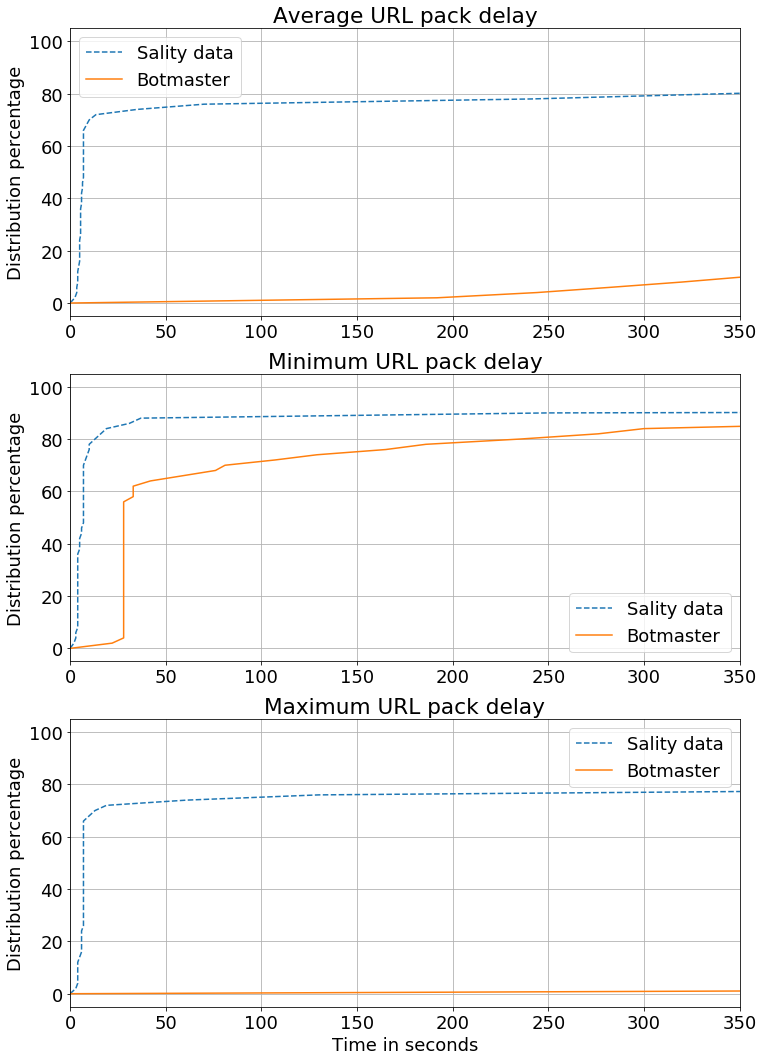

In [16]:
# BV1-PS1
if 1 in botmasters[1]:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18))
    
    createPlot(ax1, ax2, ax3)
    plotData(1, 1)
    setPlotAttributes(ax1, ax2, ax3)

    fig.savefig('figures/BV1-PS1.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

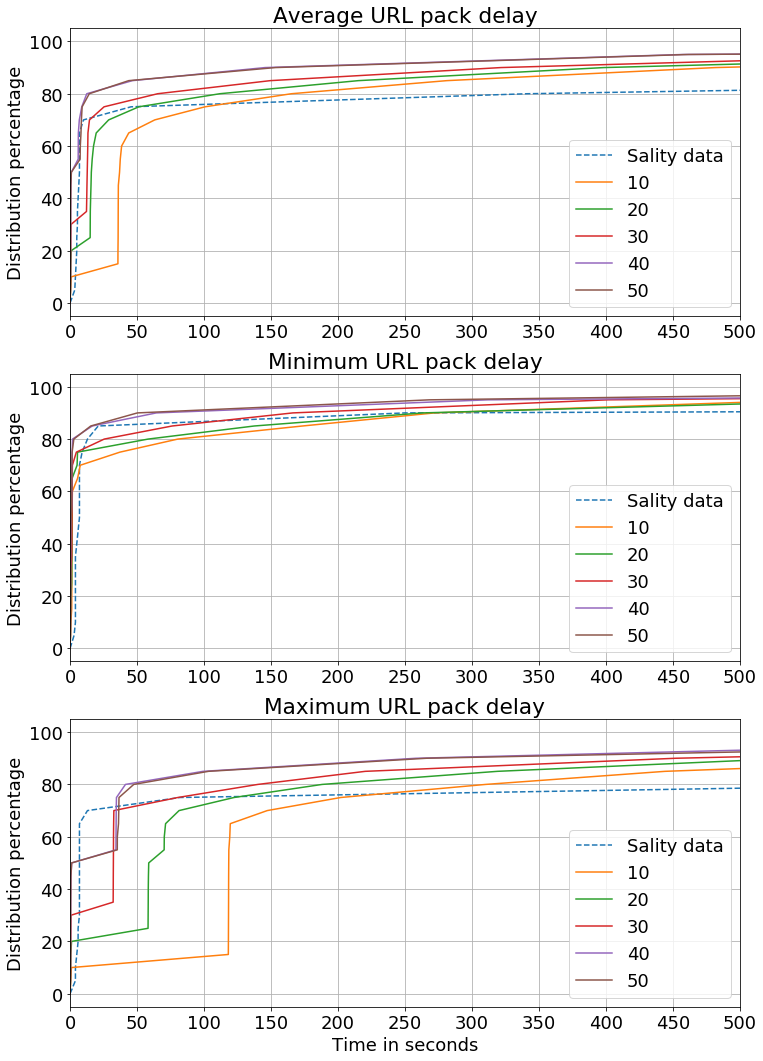

In [13]:
# BV2-PS1
if 1 in botmasters[2]:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18))
    
    createPlot(ax1, ax2, ax3)
    plotData(2, 1)
    setPlotAttributes(ax1, ax2, ax3)

    fig.savefig('figures/BV2-PS1.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

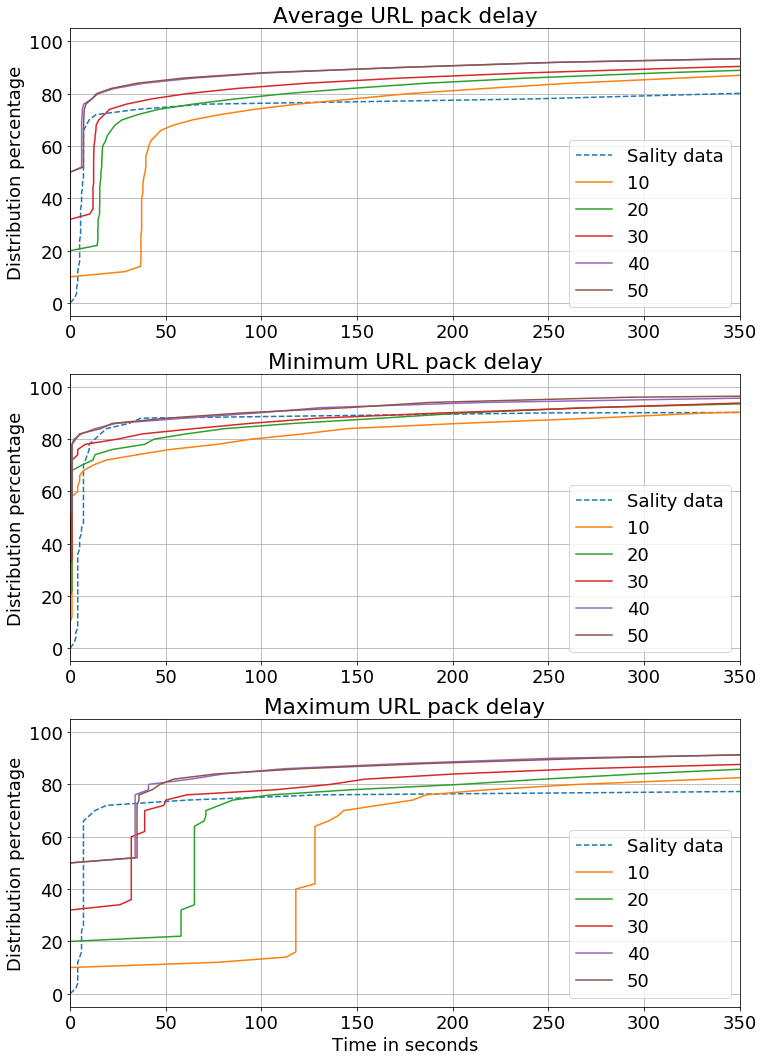

In [21]:
# BV3-PS1
if 1 in botmasters[3]:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18))
    
    createPlot(ax1, ax2, ax3)
    plotData(3, 1)
    setPlotAttributes(ax1, ax2, ax3)

    fig.savefig('figures/BV3-PS1.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

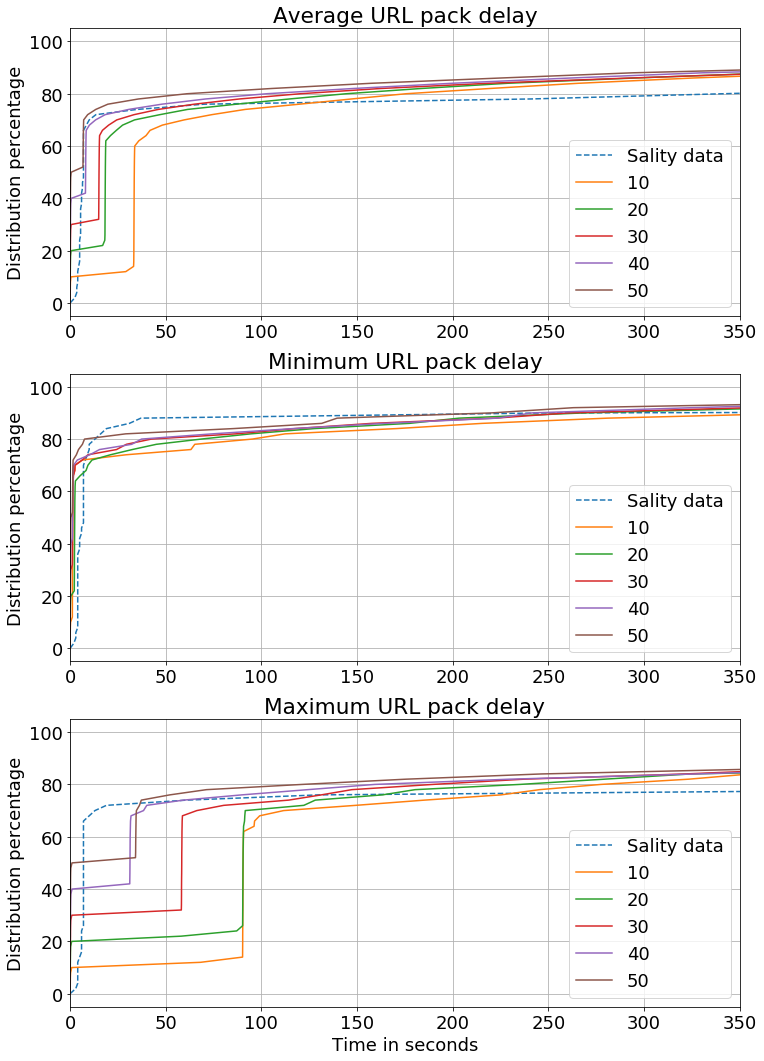

In [23]:
# BV3-PS2
if 2 in botmasters[3]:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18))
    
    createPlot(ax1, ax2, ax3)
    plotData(3, 2)
    setPlotAttributes(ax1, ax2, ax3)

    fig.savefig('figures/BV3-PS2.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

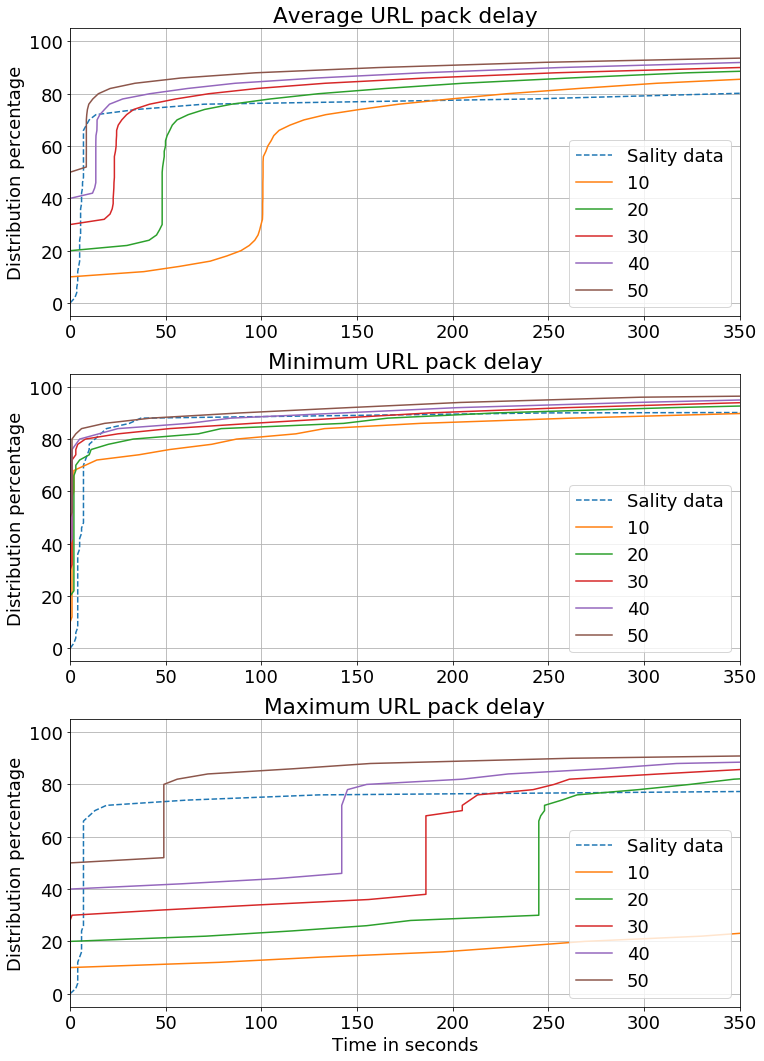

In [24]:
# BV3-PS3
if 3 in botmasters[3]:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18))
    
    createPlot(ax1, ax2, ax3)
    plotData(3, 3)
    setPlotAttributes(ax1, ax2, ax3)

    fig.savefig('figures/BV3-PS3.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

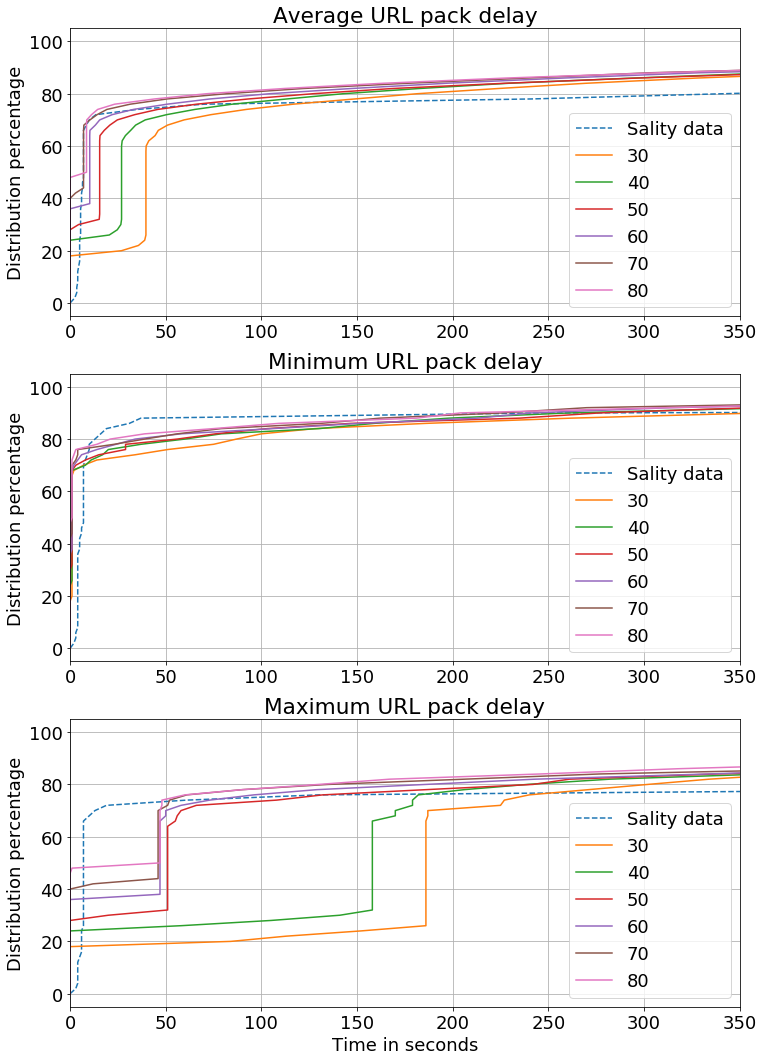

In [10]:
# BV3-PS4
if 4 in botmasters[3]:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,18))
    
    createPlot(ax1, ax2, ax3)
    plotData(3, 4)
    setPlotAttributes(ax1, ax2, ax3)

    fig.savefig('figures/BV3-PS4.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')